In [1]:
!pip install -q seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,roc_auc_score,roc_curve

In [4]:
df=pd.read_csv("/content/drive/MyDrive/creditcard.csv.zip")

In [5]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

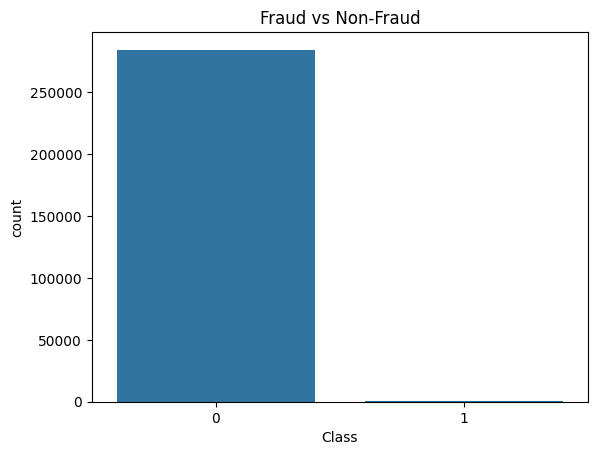

Fraudulent transactions:  492
Non-Fraudulent transactions:  284315


In [9]:
sns.countplot(x='Class',data=df)
plt.title('Fraud vs Non-Fraud')
plt.show()

print("Fraudulent transactions: ",
sum(df['Class'] == 1))
print("Non-Fraudulent transactions: ",
sum(df['Class'] == 0))

In [10]:
X=df.drop('Class', axis=1)
y=df['Class']

scaler=StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3,random_state=42,stratify=y)

In [11]:
log_model=LogisticRegression(max_iter=1000)
log_model.fit(X_train,y_train)

y_pred=log_model.predict(X_test)

print("Logistic Regression Results")
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

Logistic Regression Results
[[85279    16]
 [   59    89]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.85      0.60      0.70       148

    accuracy                           1.00     85443
   macro avg       0.92      0.80      0.85     85443
weighted avg       1.00      1.00      1.00     85443



In [12]:
rf_model=RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train,y_train)

y_pred_rf=rf_model.predict(X_test)

print("Random Forest Results")
print(confusion_matrix(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

Random Forest Results
[[85290     5]
 [   35   113]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.96      0.76      0.85       148

    accuracy                           1.00     85443
   macro avg       0.98      0.88      0.92     85443
weighted avg       1.00      1.00      1.00     85443



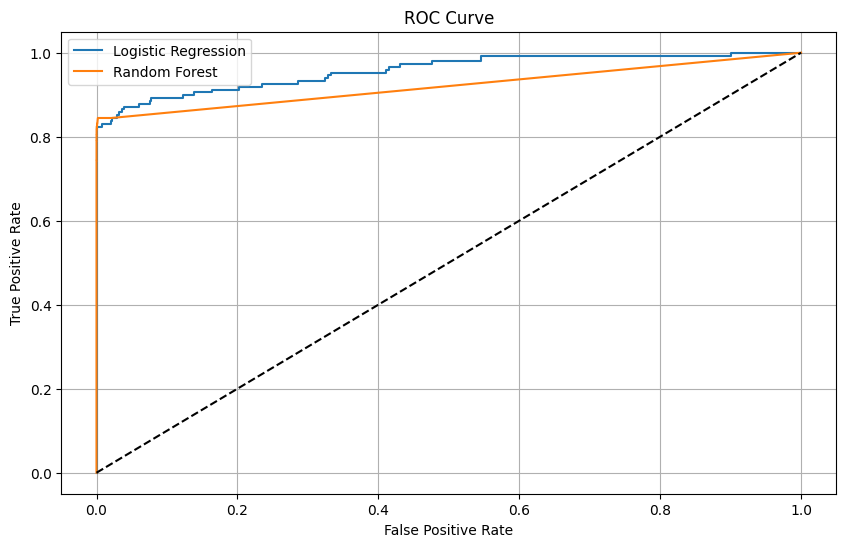

Logistic AUC: 0.9575370375944854
Random Forest AUC: 0.9206108212673663


In [13]:
log_probs=log_model.predict_proba(X_test)[:,1]
rf_probs=rf_model.predict_proba(X_test)[:,1]

fpr_log,tpr_log,_=roc_curve(y_test,log_probs)
fpr_rf, tpr_rf,_=roc_curve(y_test,rf_probs)

plt.figure(figsize=(10,6))
plt.plot(fpr_log, tpr_log,label='Logistic Regression')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot([0,1],[0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()
plt.show()

print("Logistic AUC:",roc_auc_score(y_test,log_probs))
print("Random Forest AUC:", roc_auc_score(y_test, rf_probs))